# Assembling detector data into images

The X-ray detectors at XFEL are made up of a number of small pieces. To get an image from the data, or analyse it spatially, we need to know where each piece is located.

This example reassembles some commissioning data from LPD, a detector which has 4 quadrants, 16 modules, and 256 tiles.
Elements (especially the quadrants) can be repositioned; talk to the detector group to ensure that you have the right
geometry information for your data.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py

from karabo_data import RunDirectory, stack_detector_data
from extra_geom import LPD_1MGeometry

In [2]:
run = RunDirectory('/gpfs/exfel/exp/XMPL/201750/p700000/proc/r0007/')
run.info()

# of trains:    507
Duration:       0:00:50.600000
First train ID: 1487289920
Last train ID:  1487290426

13 detector modules (FXE_DET_LPD1M-1)
  e.g. module FXE_DET_LPD1M-1 0 : 256 x 256 pixels
  FXE_DET_LPD1M-1/DET/0CH0:xtdf
  30 frames per train, up to 15210 frames total

0 instrument sources (excluding detectors):

0 control sources:



In [3]:
# Find a train with some data in
empty = np.asarray([])
for tid, train_data in run.trains():
    module_imgs = sum(d.get('image.data', empty).shape[0] for d in train_data.values())
    if module_imgs:
        print(tid, module_imgs)
        break

1487289920 390


In [4]:
tid, train_data = run.train_from_id(1487289920)
print(tid)
for dev in sorted(train_data.keys()):
    print(dev, end='\t')
    try:
        print(train_data[dev]['image.data'].shape)
    except KeyError:
        print("No image.data")

1487289920
FXE_DET_LPD1M-1/DET/0CH0:xtdf	(30, 256, 256)
FXE_DET_LPD1M-1/DET/11CH0:xtdf	(30, 256, 256)
FXE_DET_LPD1M-1/DET/12CH0:xtdf	(30, 256, 256)
FXE_DET_LPD1M-1/DET/13CH0:xtdf	(30, 256, 256)
FXE_DET_LPD1M-1/DET/14CH0:xtdf	(30, 256, 256)
FXE_DET_LPD1M-1/DET/15CH0:xtdf	(30, 256, 256)
FXE_DET_LPD1M-1/DET/1CH0:xtdf	(30, 256, 256)
FXE_DET_LPD1M-1/DET/2CH0:xtdf	(30, 256, 256)
FXE_DET_LPD1M-1/DET/4CH0:xtdf	(30, 256, 256)
FXE_DET_LPD1M-1/DET/6CH0:xtdf	(30, 256, 256)
FXE_DET_LPD1M-1/DET/7CH0:xtdf	(30, 256, 256)
FXE_DET_LPD1M-1/DET/8CH0:xtdf	(30, 256, 256)
FXE_DET_LPD1M-1/DET/9CH0:xtdf	(30, 256, 256)


Extract the detector images into a single Numpy array:

In [5]:
modules_data = stack_detector_data(train_data, 'image.data')
modules_data.shape

(30, 16, 256, 256)

Let's look at the image from a single module. You can see where it's divided up into tiles:

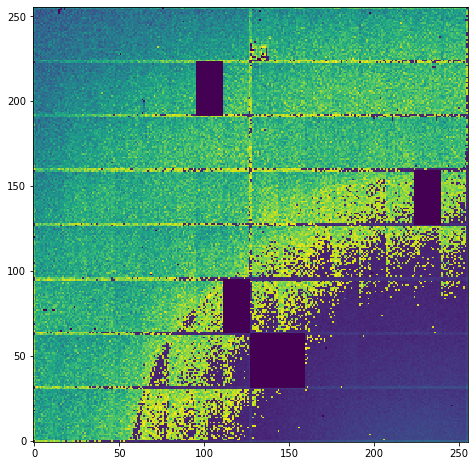

In [6]:
plt.figure(figsize=(8, 8))
plt.imshow(modules_data[10, 2], vmin=0, vmax=3000, origin='lower')

Here's a single tile:

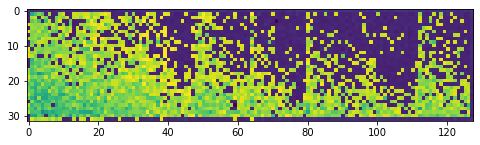

In [7]:
splitted = LPD_1MGeometry.split_tiles(modules_data[10, 2])
plt.figure(figsize=(8, 8))
plt.imshow(splitted[11], vmin=0, vmax=3000)

Load the geometry from a file, along with the quadrant positions used here.

In the future, geometry information will be stored in the calibration catalogue.

In [8]:
# From March 18; converted to XFEL standard coordinate directions
quadpos = [(11.4, 299), (-11.5, 8), (254.5, -16), (278.5, 275)]  # mm

geom = LPD_1MGeometry.from_h5_file_and_quad_positions('lpd_mar_18_axesfixed.h5', quadpos)

Reassemble and show a detector image using the geometry:

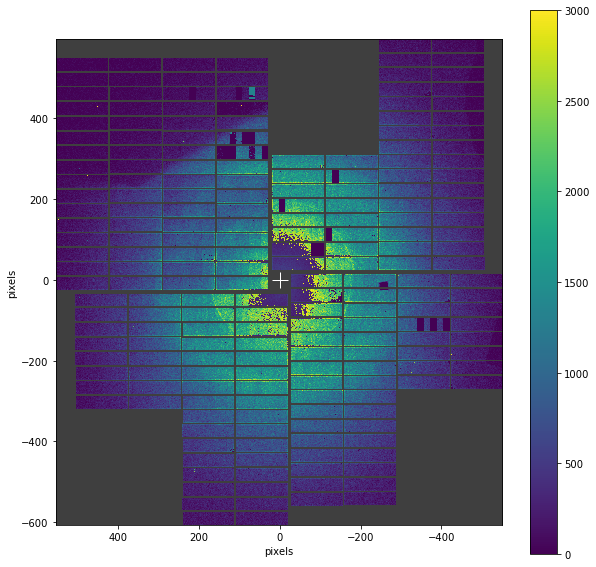

In [9]:
geom.plot_data_fast(modules_data[12], vmin=0, vmax=3000)

Reassemble detector data into a numpy array for further analysis. The areas without data have the special value *`nan`* to mark them as missing.

(30, 1203, 1105)


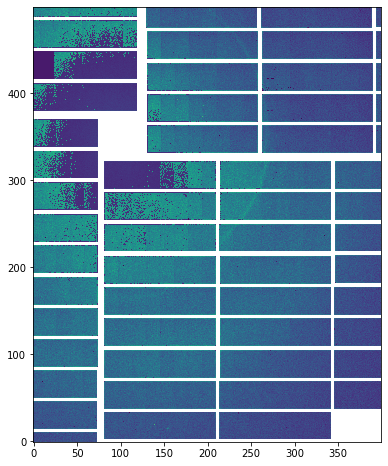

In [10]:
res, centre = geom.position_modules_fast(modules_data)
print(res.shape)
plt.figure(figsize=(8, 8))
plt.imshow(res[12, 250:750, 450:850], vmin=-400, vmax=5000, origin='lower')